In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 100

In [2]:
df = pd.read_csv('../data/listings.csv')

In [3]:
df['performance'] = df['reviews_per_month'] * df['review_scores_rating']
df = df.loc[df['performance'].notnull()].reset_index()
df['host_response_rate'] = df['host_response_rate'].str.split('%').str[0].astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.split('%').str[0].astype(float)

In [4]:
low = np.percentile(df['performance'],25)
high = np.percentile(df['performance'],90)

low = df.loc[df['performance'] <= low]
high = df.loc[df['performance'] >= high]

# Response time

In [19]:
bar_low = low['host_response_time'].value_counts(normalize=True).to_frame()
bar_high = high['host_response_time'].value_counts(normalize=True).to_frame()

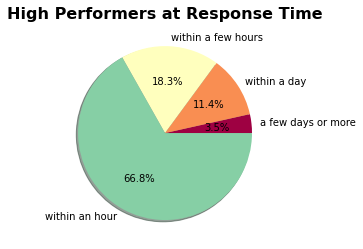

In [74]:
type_labels = bar_high.sort_values('host_response_time').index 
type_counts = bar_high.sort_values('host_response_time')['host_response_time']

the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 5)]

plt.title('High Performers at Response Time',fontsize=16,fontweight=600)
plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

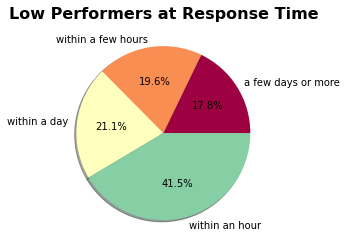

In [73]:
type_labels = bar_low.sort_values('host_response_time').index 
type_counts = bar_low.sort_values('host_response_time')['host_response_time']

the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 5)]

plt.title('Low Performers at Response Time',fontsize=16,fontweight=600)
plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

# Response Rate

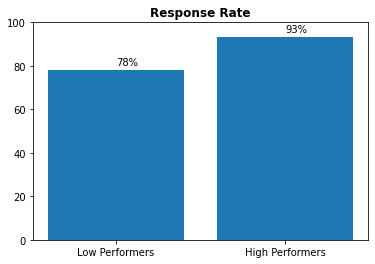

In [76]:
high_value = high['host_response_rate'].mean()
low_value = low['host_response_rate'].mean()

plt.bar(['Low Performers','High Performers'],[low_value,high_value])
plt.ylim([0,100])
plt.text(0,low_value+2,str(round(low_value))+'%')
plt.text(1,high_value+2,str(round(high_value))+'%')
plt.title('Response Rate',fontweight=600)
plt.show()

# Host acceptance Rate

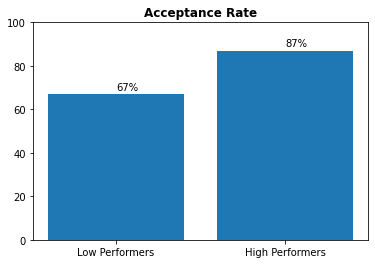

In [77]:
high_value = high['host_acceptance_rate'].mean()
low_value = low['host_acceptance_rate'].mean()

plt.title('Acceptance Rate',fontweight=600)
plt.bar(['Low Performers','High Performers'],[low_value,high_value])
plt.ylim([0,100])
plt.text(0,low_value+2,str(round(low_value))+'%')
plt.text(1,high_value+2,str(round(high_value))+'%')
plt.show()